# 1 Introdução

## Lidando com Outliers e Dados Duplicados

Este notebook aborda técnicas para lidar com outliers e dados duplicados em um dataset. Utilizaremos o dataset "House Prices - Advanced Regression Techniques" do Kaggle como exemplo.

# 2 Carregamento e Exploração Inicial do Dataset

## 2.1 Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 2.2 Carregamento do Dataset

Dataset orignalmente retirado de https://www.kaggle.com/datasets/lespin/house-prices-dataset

Descrição do Dataset

Este dataset, originalmente retirado de Kaggle - House Prices Dataset, foi editado para a finalidade deste notebook. Ele contém informações sobre preços de imóveis e diversas características associadas a cada propriedade. O objetivo é analisar e manipular os dados para entender como as características dos imóveis influenciam seus preços.

Conteúdo do Dataset:

Características dos Imóveis: Inclui variáveis como tamanho da casa, número de quartos, número de banheiros, tipo de garagem, entre outros.

Preço: Preço final do imóvel.

In [2]:
df = pd.read_csv('datasets/house_prices.csv')

## 2.3 Visualização Inicial dos Dados

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## 2.4 Informações do Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     3210 non-null   int64  
 1   MSZoning       3205 non-null   object 
 2   LotFrontage    2673 non-null   float64
 3   LotArea        3210 non-null   int64  
 4   Street         3210 non-null   object 
 5   Alley          229 non-null    object 
 6   LotShape       3210 non-null   object 
 7   LandContour    3210 non-null   object 
 8   Utilities      3208 non-null   object 
 9   LotConfig      3210 non-null   object 
 10  LandSlope      3210 non-null   object 
 11  Neighborhood   3210 non-null   object 
 12  Condition1     3210 non-null   object 
 13  Condition2     3210 non-null   object 
 14  BldgType       3210 non-null   object 
 15  HouseStyle     3210 non-null   object 
 16  OverallQual    3210 non-null   int64  
 17  OverallCond    3210 non-null   int64  
 18  YearBuil

## 2.5 Estatísticas Descritivas

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,3210.000000,2673.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.00000,3186.000000,3209.000000,3209.000000,...,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,1595.000000
mean,57.227414,69.344557,10151.471963,6.085670,5.564174,1971.130530,1984.22243,102.517891,443.111250,48.560922,...,93.931464,48.029595,23.068536,2.496262,16.363240,2.118692,49.679439,6.194704,2007.797508,181484.144201
std,42.584669,23.388332,7715.993940,1.408632,1.118595,30.367348,20.91334,179.280638,457.325094,168.217985,...,127.379180,68.937374,63.684142,24.602419,56.912518,34.247599,553.698169,2.717355,1.312307,79885.210537
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7427.750000,5.000000,5.000000,1953.000000,1965.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,50.000000,68.000000,9465.000000,6.000000,5.000000,1973.000000,1993.00000,0.000000,368.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,70.000000,80.000000,11613.000000,7.000000,6.000000,2001.000000,2004.00000,165.000000,736.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.00000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 2.6 Selecionando Variáveis Numéricas

In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [7]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     3210 non-null   int64  
 1   LotFrontage    2673 non-null   float64
 2   LotArea        3210 non-null   int64  
 3   OverallQual    3210 non-null   int64  
 4   OverallCond    3210 non-null   int64  
 5   YearBuilt      3210 non-null   int64  
 6   YearRemodAdd   3210 non-null   int64  
 7   MasVnrArea     3186 non-null   float64
 8   BsmtFinSF1     3209 non-null   float64
 9   BsmtFinSF2     3209 non-null   float64
 10  BsmtUnfSF      3209 non-null   float64
 11  TotalBsmtSF    3209 non-null   float64
 12  1stFlrSF       3210 non-null   int64  
 13  2ndFlrSF       3210 non-null   int64  
 14  LowQualFinSF   3210 non-null   int64  
 15  GrLivArea      3210 non-null   int64  
 16  BsmtFullBath   3208 non-null   float64
 17  BsmtHalfBath   3208 non-null   float64
 18  FullBath

# 3 Identificação e Tratamento de Outliers

## 3.1 Identificação de Outliers com Boxplot

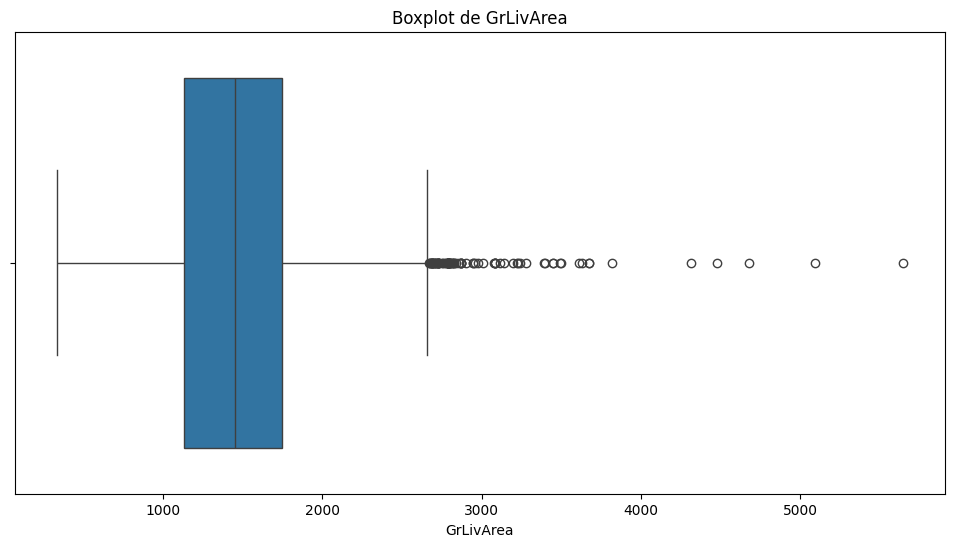

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, x='GrLivArea')
plt.title('Boxplot de GrLivArea')
plt.show()

## 3.2 Remoção de Outliers

In [9]:
# Definindo o limite superior como o percentil 99
upper_limit = numeric_df['GrLivArea'].quantile(0.99)
numeric_df_treated = numeric_df[numeric_df['GrLivArea'] < upper_limit]

## 3.3 Visualização após Remoção de Outliers

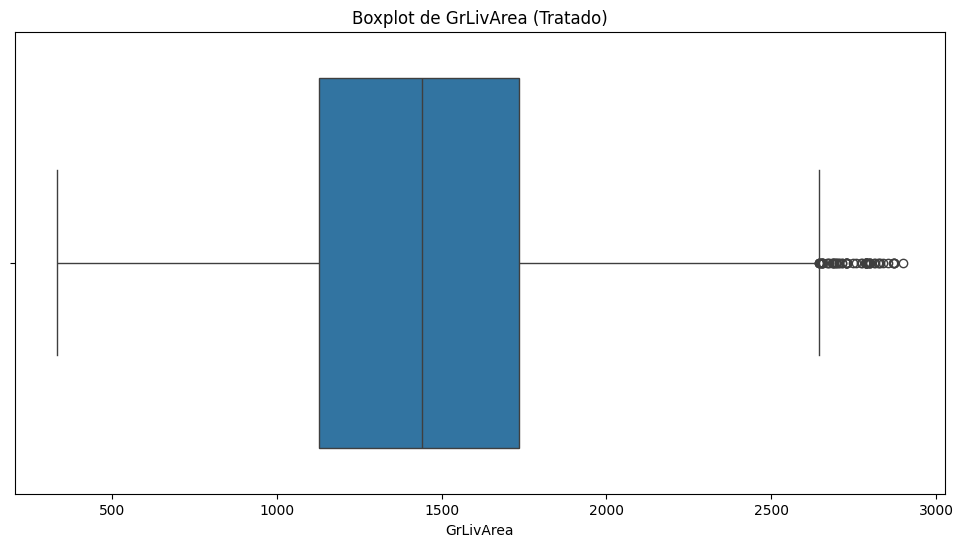

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df_treated, x='GrLivArea')
plt.title('Boxplot de GrLivArea (Tratado)')
plt.show()

# 4 Identificação e Remoção de Dados Duplicados

## 4.1 Verificação de Duplicatas

In [11]:
duplicates = numeric_df_treated.duplicated()
num_duplicates = duplicates.sum()
print(f"Número de registros duplicados: {num_duplicates}")

Número de registros duplicados: 288


## 4.2 Remoção de Duplicatas

In [12]:
numeric_df_treated_wo_duplicates = numeric_df_treated.drop_duplicates()

## 4.3 Verificação após Remoção

In [13]:
duplicates_check = numeric_df_treated_wo_duplicates.duplicated()
num_duplicates_check = duplicates_check.sum()
print(f"Número de registros duplicados após remoção: {num_duplicates_check}")

Número de registros duplicados após remoção: 0


# 5 Imputação de dados faltantes

## 5.1 Imputação dos valores faltantes com a média da coluna

In [14]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df_treated_wo_duplicates), columns=numeric_df_treated_wo_duplicates.columns)

# 6 Normalização dos dados

In [15]:
df_scaled = df_imputed.copy()

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

df_scaled.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.308566,0.0,...,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.300993
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.427448,0.0,...,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.254180
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.212413,0.0,...,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.327001
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.094406,0.0,...,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0.182226
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.286276,0.0,...,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.372947


# 7 Comparação dos Resultados de ML com Dados Brutos e Tratados

## 7.1 Preparação dos Dados

In [16]:
X_raw = df_imputed.drop('SalePrice', axis=1)
y_raw = df_imputed['SalePrice'].loc[X_raw.index]

X_treated = df_scaled.drop('SalePrice', axis=1)
y_treated = df_scaled['SalePrice'].loc[X_treated.index]

## 7.2 Divisão dos Dados em Treino e Teste

In [17]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(X_treated, y_treated, test_size=0.2, random_state=42)

# 7.3 Treinamento do Modelo com Dados Brutos

In [18]:
model_raw = LinearRegression()
model_raw.fit(X_train_raw, y_train_raw)
predictions_raw = model_raw.predict(X_test_raw)

## 7.4 Treinamento do Modelo com Dados Tratados

In [19]:
model_treated = LinearRegression()
model_treated.fit(X_train_treated, y_train_treated)
predictions_treated = model_treated.predict(X_test_treated)

## 7.5 Avaliação dos Resultados

In [20]:
# Exemplo de valores para mse_raw e mse_treated
mse_raw = mean_squared_error(y_test_raw, predictions_raw)
mse_treated = mean_squared_error(y_test_treated, predictions_treated)

# Calculando a diferença percentual
percentual_difference = ((mse_raw - mse_treated) / mse_raw) * 100

# Imprimindo os resultados
print(f"MSE com dados brutos: {mse_raw}")
print(f"MSE com dados tratados: {mse_treated}")
print(f"Diferença percentual: {percentual_difference:.2f}%")

MSE com dados brutos: 1687792353.1758497
MSE com dados tratados: 0.005073569613222351
Diferença percentual: 100.00%


In [21]:
# Exemplo de valores para y_test_raw, predictions_raw, y_test_treated e predictions_treated

# Calculando o R^2 para dados brutos e tratados
r2_raw = r2_score(y_test_raw, predictions_raw)
r2_treated = r2_score(y_test_treated, predictions_treated)

# Calculando a diferença percentual
percentual_difference = ((r2_raw - r2_treated) / r2_raw) * 100

# Imprimindo os resultados
print(f"R^2 com dados brutos: {r2_raw:.2f}")
print(f"R^2 com dados tratados: {r2_treated:.2f}")
print(f"Diferença percentual: {percentual_difference:.2f}%")

R^2 com dados brutos: 0.38
R^2 com dados tratados: 0.38
Diferença percentual: -0.01%


## 5.6 Visualização dos Resultados

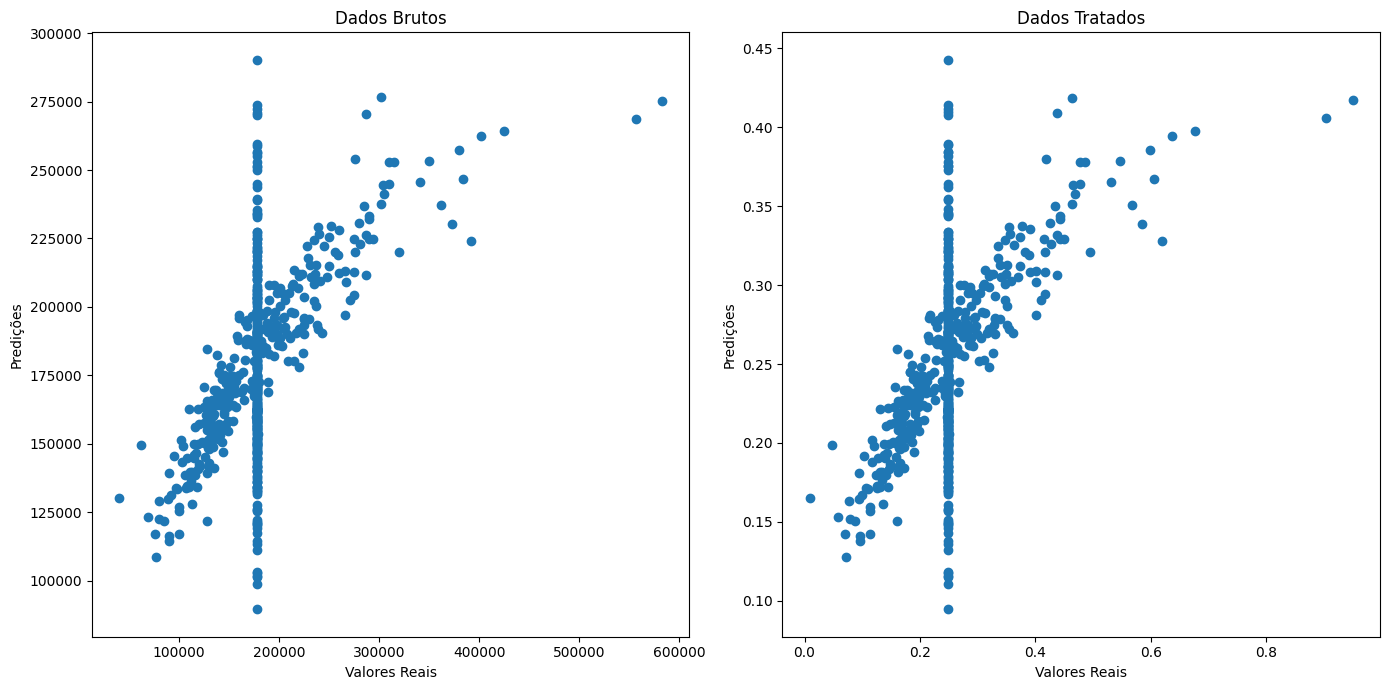

In [22]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_test_raw, predictions_raw)
plt.title('Dados Brutos')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')

plt.subplot(1, 2, 2)
plt.scatter(y_test_treated, predictions_treated)
plt.title('Dados Tratados')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')

plt.tight_layout()
plt.show()